<a href="https://colab.research.google.com/github/Kshitij021994/EDA_Hotel_Booking_Analysis/blob/main/EDA_KSHITIJ_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hb = pd.read_csv("/content/drive/MyDrive/ALMABETTER/PROJECTS/CAPSTONE PROJECTS/1.EDA/1.EDA_HOTEL/hb.csv")

In [ ]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hb.shape

(119390, 32)

In [ ]:
hb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Data Description**

**hotel :** Hotel type.

**is_canceled :** value indicates if the booking is canceled or not.

**lead_time :** How long in advance the booking was made.

**arrival_date_year :** Customer arrival year.

**arrival_date_month :** In which month of the year customer visited hotel.

**arrival_date_week_number :** In which week of the year customer arrived.

**arrival_date_day_of_month :** Date of the month customer visited hotel.

**stays_in_weekend_nights :** Customer stayed or booked to stay in hotel during weekend nights.

**stays_in_week_nights :** Customer stayed in hotel during week nights.

**adults :** Number of adults

**children :** number of children.

**babies :** Number of babies.

**meal :** Type of meal booked. : country : Country of orgin of cutomer.

**market_segment :** where the bookings came from.

**distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” .

**is_repeated_guest :** Value indicating if the booking name was from a repeated guest (1) or not (0).

**previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking.

**previous_bookings_not_canceled :** umber of previous bookings that were cancelled by the customer prior to the current booking.

**reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons.

**assigned_room_type :** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due. booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS.

**deposit_type :** Indication on if the customer made a deposit to guarantee the booking.

**agent :** ID of the travel agency that made the booking.

**company :** ID of the company/entity that made the booking or responsible for paying the booking.

**days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer.

**customer_type :** Type of booking, assuming one of four categories.

**adr :** Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

**required_car_parking_spaces :** Number of car parking spaces required by the customer.

**total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor).

**reservation_status :** Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out: customer check out from hotel,No show: Customer did not check-in hotel and informed hotel with reason.

**reservation_status_date :** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking cancelled or when did the customer checked out of the hotel

# **Data Manipulation**

In [ ]:
hb.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
hb.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni


There are four columns (children, Country, agent and company)which contain null values.

We have to find a way to replace those null values with something meaningfull.

we will replace the 'nan' values of children,agent,company coulums with '0' and country column 'nan' values with 'no data'.

In [ ]:

hb[['children','agent','company']]=hb[['children','agent','company']].fillna(0,inplace=True)

In [ ]:
hb['country'].fillna('no data',inplace=True)

In [ ]:
hb.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                          119390
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                             119390
company         

In [ ]:
hb.drop_duplicates(inplace=True)
hb.shape

(87340, 32)

Data is Cleaned, Now there are No Null Values in the Data.

We can work on the data smoothly now

In [ ]:
#Adding total stay column in dataframe that is (stays_in_week_nights + stays_in_weekend_nights)
hb['total_stay'] = hb['stays_in_week_nights']+hb['stays_in_weekend_nights']

#Adding total people columns that is(adults + children + babies)
hb['total_people'] = hb['adults'] + hb['children'] + hb['babies']

In [ ]:
#create dataframe of numerical columns
numerical_df = hb._get_numeric_data()
numerical_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
0,0,342,2015,27,1,0,0,2,0,0,0,0,3,0,0.0,0,0,0
1,0,737,2015,27,1,0,0,2,0,0,0,0,4,0,0.0,0,0,0
2,0,7,2015,27,1,0,1,1,0,0,0,0,0,0,75.0,0,0,1
3,0,13,2015,27,1,0,1,1,0,0,0,0,0,0,75.0,0,0,1
4,0,14,2015,27,1,0,2,2,0,0,0,0,0,0,98.0,0,1,2


In [ ]:
#create correlation matrix
numerical_df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
is_canceled,1.000000,0.184697,0.088048,0.001379,0.005144,0.060231,0.082900,0.081685,-0.020880,-0.089646,0.051503,-0.052157,-0.093621,0.004609,0.128040,-0.184222,-0.120421,0.084094
lead_time,0.184697,1.000000,0.139034,0.101160,0.009716,0.235092,0.310142,0.140348,-0.003533,-0.147050,0.005375,-0.078956,0.077027,0.131952,0.023473,-0.086567,0.034288,0.318254
arrival_date_year,0.088048,0.139034,1.000000,-0.514260,-0.010148,0.005134,0.003557,0.038572,-0.022999,0.024365,-0.054223,0.027272,0.008627,-0.027930,0.176091,-0.039789,0.064267,0.004560
arrival_date_week_number,0.001379,0.101160,-0.514260,1.000000,0.093710,0.026774,0.027783,0.024382,0.014084,-0.036870,0.007202,-0.020825,0.011863,0.013680,0.098288,0.008952,0.046663,0.030643
arrival_date_day_of_month,0.005144,0.009716,-0.010148,0.093710,1.000000,-0.017865,-0.028397,-0.001236,-0.000410,-0.004156,-0.008531,0.000164,0.006348,0.006944,0.022442,0.009140,-0.001692,-0.027773
stays_in_weekend_nights,0.060231,0.235092,0.005134,0.026774,-0.017865,1.000000,0.555634,0.088232,0.013762,-0.107015,-0.020657,-0.056687,0.050258,-0.031949,0.038868,-0.042955,0.032376,0.786303
stays_in_week_nights,0.082900,0.310142,0.003557,0.027783,-0.028397,0.555634,1.000000,0.095497,0.016080,-0.113586,-0.018792,-0.058525,0.085109,0.002060,0.053191,-0.044349,0.037787,0.950586
adults,0.081685,0.140348,0.038572,0.024382,-0.001236,0.088232,0.095497,1.000000,0.016613,-0.171748,-0.042106,-0.120935,-0.048087,-0.015811,0.248951,0.007785,0.112758,0.103911
babies,-0.020880,-0.003533,-0.022999,0.014084,-0.000410,0.013762,0.016080,0.016613,1.000000,-0.012960,-0.005388,-0.009186,0.081178,-0.006828,0.023547,0.030960,0.094954,0.017088
is_repeated_guest,-0.089646,-0.147050,0.024365,-0.036870,-0.004156,-0.107015,-0.113586,-0.171748,-0.012960,1.000000,0.206367,0.441449,0.006025,-0.012808,-0.153071,0.071996,-0.001360,-0.124367


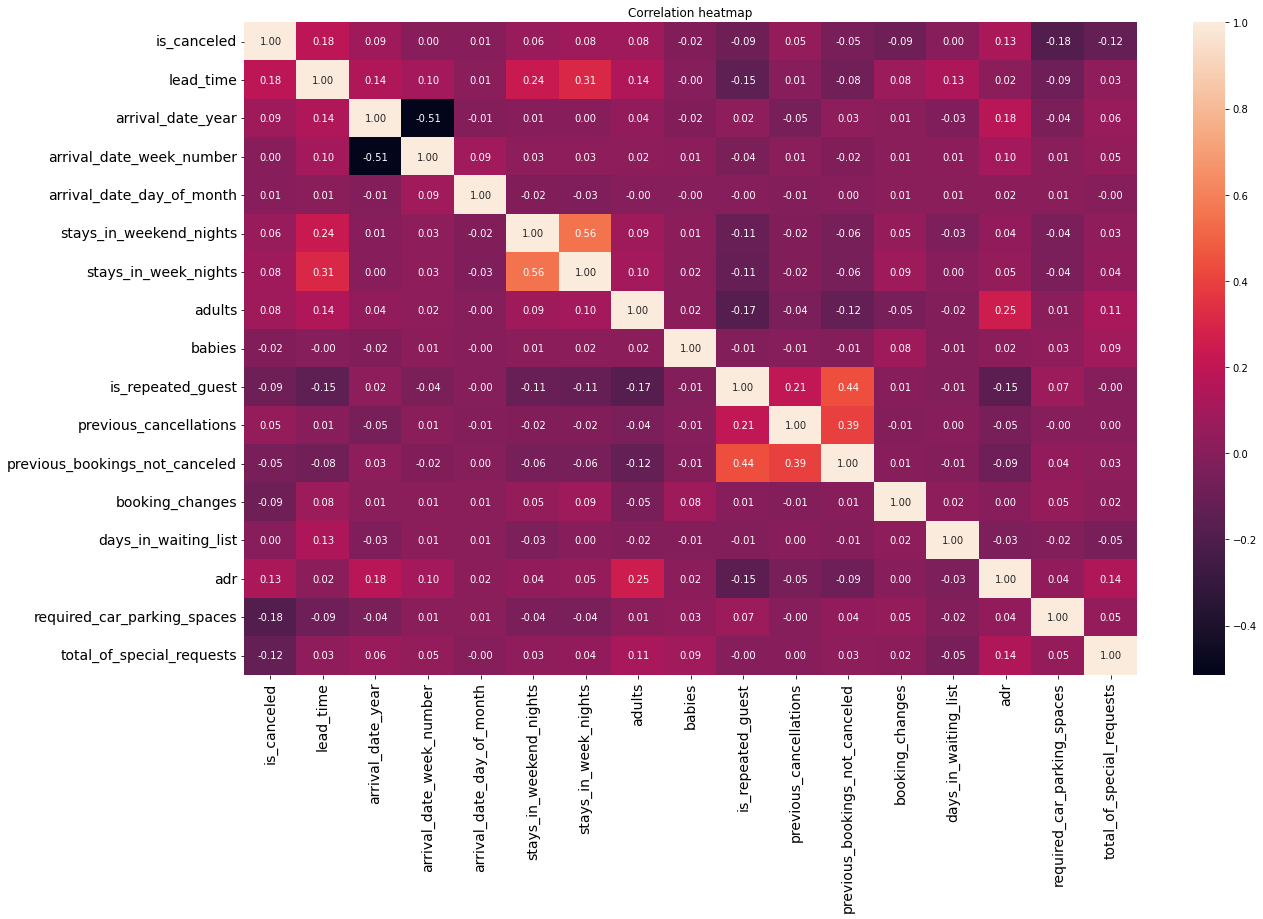

In [ ]:
#create heatmap of above correlation matrix so that it is easy to read and understand.
plt.figure(figsize=(20,12))
sns.heatmap(numerical_df.corr(),annot=True,fmt = '.2f')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation heatmap');

# **Inferences**
Total_stay and lead time have slight correlation it. This might means that
customer plan reservation before their actual arrival.

Adr(Average Daily Rate) is slightly correlated with total people, which makes sense as more number of people means more revenue.

Previous booking not cancelled and repeated guest have high correlation as repeated guest are most likely to be who has not cancelled their previous bookings.

We can also see that some columns have high correlation between them for example total people with adult and children it is because as those column are dervied from them by addition.

# **MOTIVATION**


**To analyse the market precisely, we have planned to bifurcate the analysis into a set of questions on which we would work on.**  

# **1. Which hotel has the most number of bookings throughout?**

In [ ]:
max_booking=hb.groupby('hotel')['hotel'].count()
max_booking

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Text(0.5, 0, 'Years')

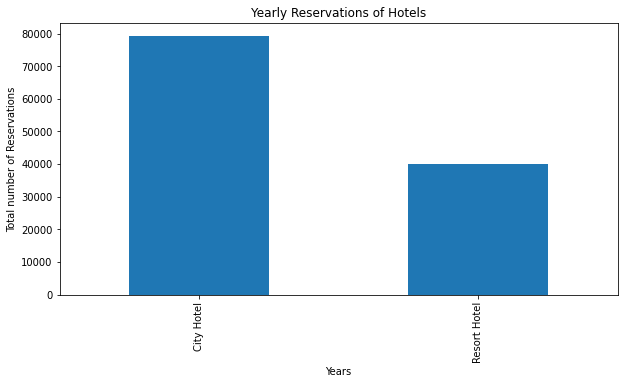

In [ ]:
max_booking.plot(kind='bar')

plt.title('Yearly Reservations of Hotels')
plt.ylabel('Total number of Reservations')
plt.xlabel('Years')

# **2. Which Year had the Maximum number of bookings throughout & on Hotel Basis?**

In [ ]:
# Bookings Throughout Year-Wise
yearly_bookings = hb['arrival_date_year'].value_counts()
yearly_bookings

# CONCLUSION :
# Year 2016 with 56,707 bookings had the Maximum Number of bookings

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [ ]:
# Bookings Yearly Hotel-Wise
yearly_bookings_h_wise=hb.groupby(['arrival_date_year','hotel'])['arrival_date_year'].count().unstack()
yearly_bookings_h_wise

hotel,City Hotel,Resort Hotel
arrival_date_year,,
2015,13682,8314
2016,38140,18567
2017,27508,13179


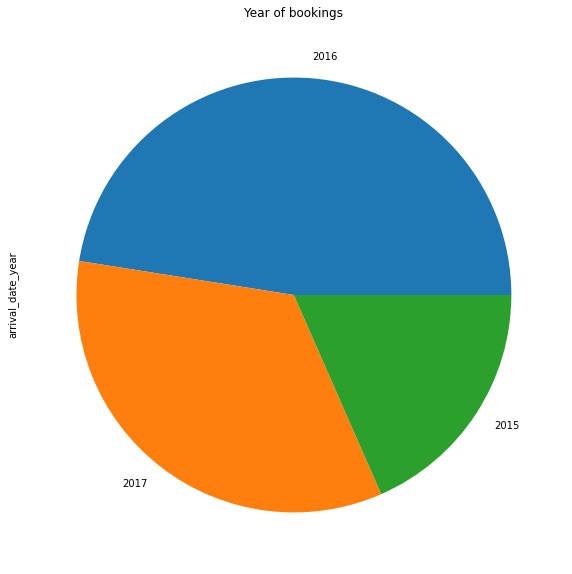

In [ ]:
diagram=yearly_bookings.plot(kind='pie', figsize = (15,10), title = 'Year of bookings')


Text(0, 0.5, 'Number of Reservations ')

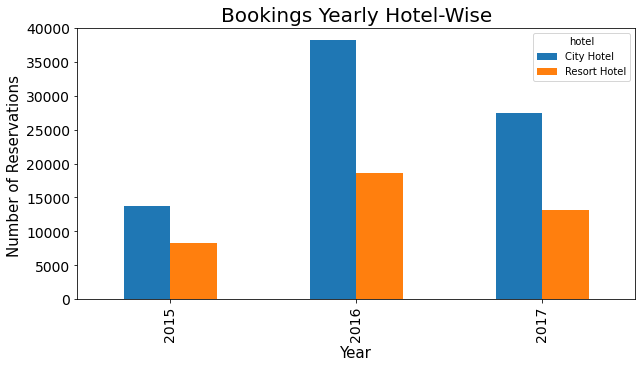

In [ ]:
# Create the figure object 
ax = yearly_bookings_h_wise.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Bookings Yearly Hotel-Wise", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Number of Reservations ", fontsize = 15)

# **The Maximum number of bookings Are in the Year 2016.**
# **Bookings in the year 2016 has been increased** **tremendously as compared to the year 2015, but can also see that in the year 2017 we** **see a fall in the bookings compared to 2016 but Greater than in the year 2015.**

# **3. Which Month had the Maximum number of bookings throughout?**

In [ ]:
monthly_bookings = hb['arrival_date_month'].value_counts()
monthly_bookings

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

Text(0.5, 0, 'Month')

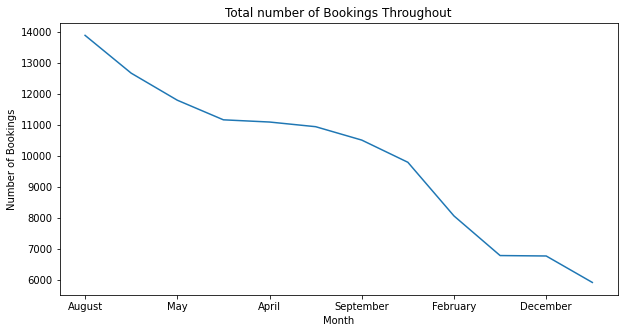

In [ ]:
monthly_bookings.plot()

plt.title('Total number of Bookings Throughout')
plt.ylabel('Number of Bookings')
plt.xlabel('Month')

# **You can Clearly observe that throughout The period i.e from 2015 to 2017 we have the Maximum numer of bookings in the month of August and the Least Bookings are being totalled in the Month of December.**

# **4.) Which Month had the maximum number of bookings in each year?**

In [ ]:
year_2015 = hb[hb['arrival_date_year']==2015]
year_2016 = hb[hb['arrival_date_year']==2016]
year_2017 = hb[hb['arrival_date_year']==2017]

monthly_bookings_2015 = year_2015['arrival_date_month'].value_counts()
monthly_bookings_2016 = year_2016['arrival_date_month'].value_counts()
monthly_bookings_2017 = year_2017['arrival_date_month'].value_counts()



In [ ]:
monthly_bookings_2015

September    5114
October      4957
August       3889
December     2920
July         2776
November     2340
Name: arrival_date_month, dtype: int64

In [ ]:
monthly_bookings_2016

October      6203
May          5478
April        5428
September    5394
June         5292
August       5063
March        4824
July         4572
November     4454
February     3891
December     3860
January      2248
Name: arrival_date_month, dtype: int64

In [ ]:
monthly_bookings_2017

May         6313
April       5661
June        5647
July        5313
March       4970
August      4925
February    4177
January     3681
Name: arrival_date_month, dtype: int64

In [ ]:
monthly_bookings_y=hb.groupby(['arrival_date_year','arrival_date_month'])['arrival_date_month'].count().unstack().fillna(0)
monthly_bookings_y

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,0.0,3889.0,2920.0,0.0,0.0,2776.0,0.0,0.0,0.0,2340.0,4957.0,5114.0
2016,5428.0,5063.0,3860.0,3891.0,2248.0,4572.0,5292.0,4824.0,5478.0,4454.0,6203.0,5394.0
2017,5661.0,4925.0,0.0,4177.0,3681.0,5313.0,5647.0,4970.0,6313.0,0.0,0.0,0.0


Text(0, 0.5, 'Number of Bookings ')

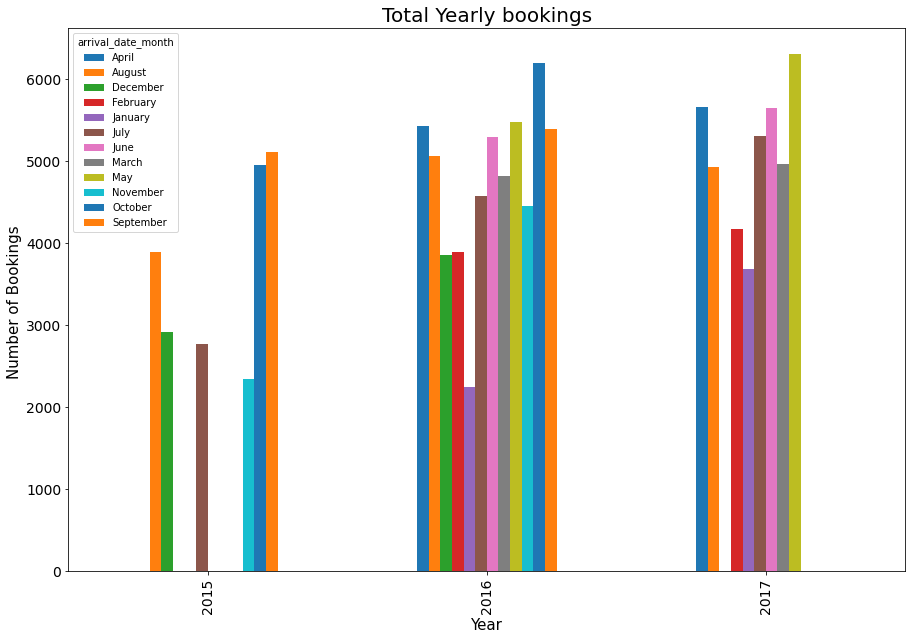

In [ ]:

ax = monthly_bookings_y.plot.bar(figsize = (15,10),fontsize = 14)

# Set the title
ax.set_title("Total Yearly bookings", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Number of Bookings ", fontsize = 15)


# **1.) September month with 5,114 bookings had the Maximum Number of bookings in the year 2015.**

# **2.) October month with 6,203 bookings had the Maximum Number of bookings in the year 2016.**

# **3.) May month with 6,313 bookings had the Maximum Number of bookings in the year 2017.**

# **5.) Which Week had the maximum number of bookings Throughout as well as in the year with maximum bookings i.e (YEAR-2016)?**

In [ ]:

week_throughout = hb['arrival_date_week_number'].value_counts()
week_2016 = year_2016['arrival_date_week_number'].value_counts()

In [ ]:
# Week with maximum number of bookings throughout
week_throughout.sort_values()

51     785
1      862
2      944
3     1047
50    1051
52    1060
5     1100
4     1125
46    1141
49    1168
48    1199
47    1288
6     1299
45    1313
53    1423
40    1426
42    1445
37    1474
8     1524
44    1550
12    1573
9     1579
39    1590
43    1605
36    1626
10    1628
7     1629
38    1633
11    1658
41    1663
14    1693
16    1735
26    1739
24    1746
22    1753
25    1786
19    1813
13    1817
20    1841
23    1871
17    1875
15    1989
21    2041
18    2087
35    2104
27    2162
29    2196
31    2286
30    2331
28    2343
32    2446
34    2485
33    2793
Name: arrival_date_week_number, dtype: int64

In [ ]:
# Week with maximum number of bookings in the Year 2016
week_2016.sort_values()

1      227
2      397
3      449
5      569
4      573
51     618
6      696
52     705
48     890
50     898
11     899
49     937
7      949
8      993
9      996
47    1001
29    1001
14    1003
28    1014
10    1027
31    1030
12    1050
26    1059
22    1060
53    1077
35    1087
37    1097
32    1099
30    1106
27    1126
19    1129
36    1136
46    1153
16    1176
33    1185
24    1203
34    1215
20    1263
15    1270
39    1277
38    1290
41    1298
23    1317
17    1339
13    1341
40    1369
45    1396
44    1406
43    1420
18    1437
21    1452
25    1468
42    1534
Name: arrival_date_week_number, dtype: int64

Text(0, 0.5, 'Number of Bookings ')

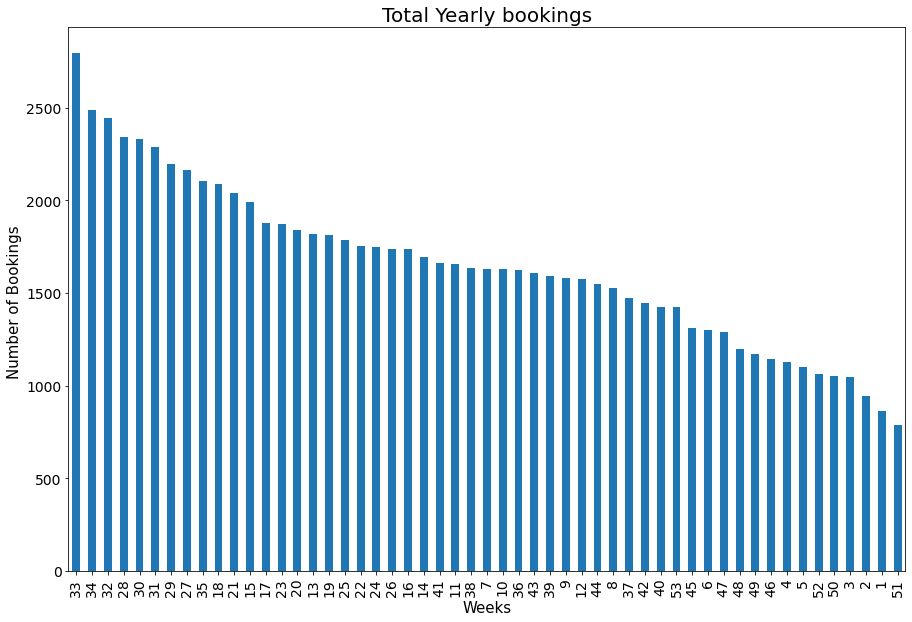

In [ ]:

ax = week_throughout.plot.bar(figsize = (15,10),fontsize = 14)

# Set the title
ax.set_title("Total Yearly bookings", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Weeks", fontsize = 15)
ax.set_ylabel("Number of Bookings ", fontsize = 15)

Text(0, 0.5, 'Number of Bookings ')

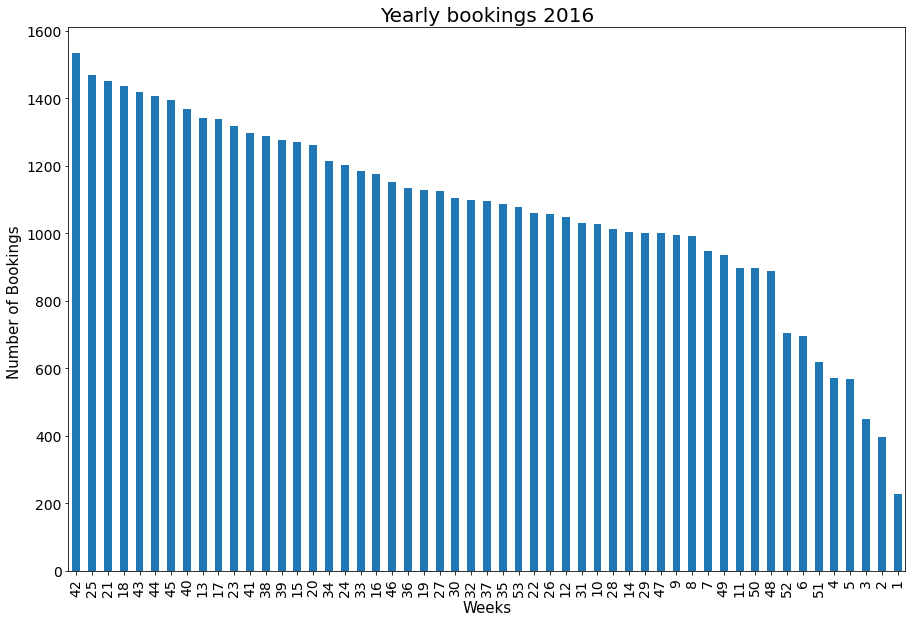

In [ ]:

ax = week_2016.plot.bar(figsize = (15,10),fontsize = 14)

# Set the title
ax.set_title("Yearly bookings 2016", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Weeks", fontsize = 15)
ax.set_ylabel("Number of Bookings ", fontsize = 15)

# **6.) What are the types of meals that the corporates prefer in their visit?**

In [ ]:
hb_corporate=hb[hb['market_segment']=='Corporate']
corporate_meals=hb_corporate.groupby(['meal'])['meal'].count()
corporate_meals

meal
BB           5150
FB             14
HB             83
SC             33
Undefined      15
Name: meal, dtype: int64

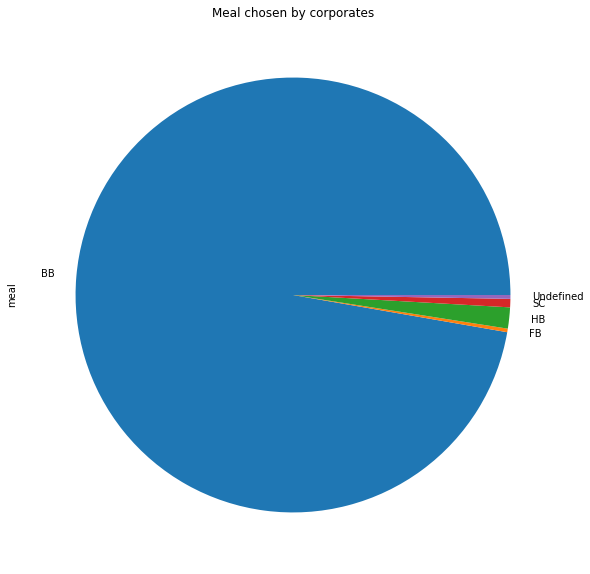

In [ ]:
corporate_meals.plot(kind = 'pie', figsize = (20,10), title = 'Meal chosen by corporates')

# **Seems that corporates mostly prefer Bed and Breakfast package at the hotel, i.e. they check-in at night and check-out by the next morning.**



# **7.)	Which hotel had Most Number of cancellations throughout?**

In [ ]:
cancelled_bookings = hb[hb['is_canceled'] != 0]
t_cancelled_bookings=cancelled_bookings[['is_canceled','hotel']].value_counts()
t_cancelled_bookings

is_canceled  hotel       
1            City Hotel      33102
             Resort Hotel    11122
dtype: int64

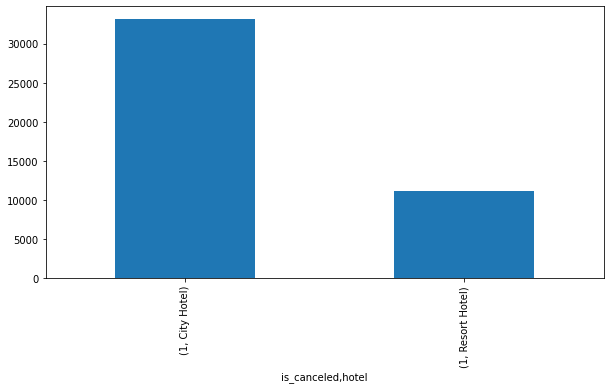

In [ ]:
t_cancelled_bookings.plot.bar()

# **City Hotels had Maximum cancellations over the Years**

# **8.) Which year has the highest number of cancellations Hotel-Wise ?**

In [ ]:

cancelled_bookings_2015 =year_2015[year_2015['is_canceled'] != 0]
cancelled_bookings_2016 = year_2016[year_2016['is_canceled'] != 0]
cancelled_bookings_2017 = year_2017[year_2017['is_canceled'] != 0]

cancelled_2015=cancelled_bookings_2015['is_canceled'].value_counts()
cancelled_2016=cancelled_bookings_2016['is_canceled'].value_counts()
cancelled_2017=cancelled_bookings_2017['is_canceled'].value_counts()

In [ ]:
cancelled_2015


1    8142
Name: is_canceled, dtype: int64

In [ ]:
cancelled_2016


1    20337
Name: is_canceled, dtype: int64

In [ ]:
cancelled_2017

1    15745
Name: is_canceled, dtype: int64

In [ ]:
cancelled_hotels=hb.groupby(['arrival_date_year','hotel','is_canceled'])['is_canceled'].count().unstack()
cancelled_hotels

is_canceled                         0      1
arrival_date_year hotel                     
2015              City Hotel     7678   6004
                  Resort Hotel   6176   2138
2016              City Hotel    22733  15407
                  Resort Hotel  13637   4930
2017              City Hotel    15817  11691
                  Resort Hotel   9125   4054

Text(0, 0.5, 'Number of Reservations ')

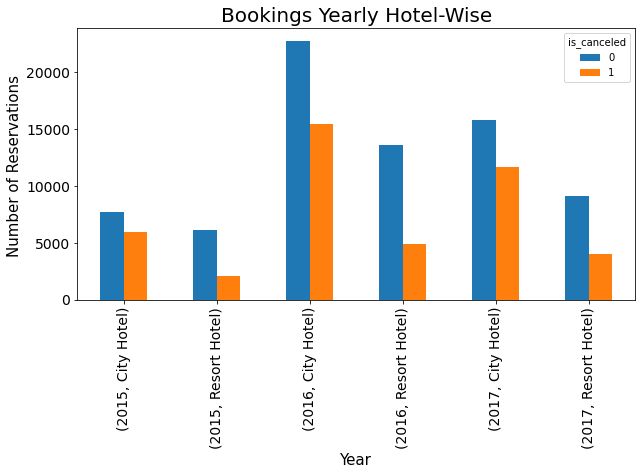

In [ ]:
ax = cancelled_hotels.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Bookings Yearly Hotel-Wise", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Year", fontsize = 15)
ax.set_ylabel("Number of Reservations ", fontsize = 15)

# **The Diagram seconds the conclusion that Year 2016 had most number of cancellations for City Hotel as well as Resort Hotel**

# **9.) Which is the Most Reserved Room Type by customer ?**

In [ ]:
hb['reserved_room_type'].value_counts()

A    56512
D    17390
E     6045
F     2821
G     2052
B      997
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

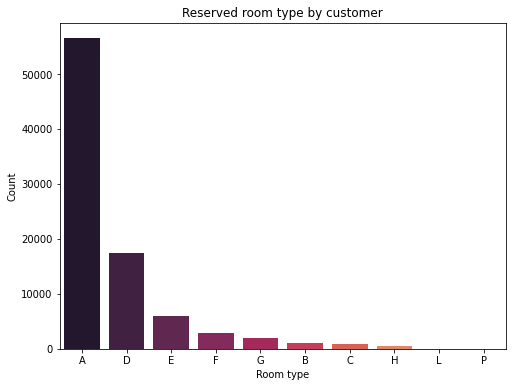

In [ ]:
#plot reserved room type by customers
plt.figure(figsize=(8,6))
sns.barplot(x=hb['reserved_room_type'].value_counts().keys(),y=hb['reserved_room_type'].value_counts(),palette='rocket')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.title('Reserved room type by customer');

# **Most reserved room type is A.**

#**Least preferred are L and P.**

# **10.) Which countries had most number of customers ?**

In [ ]:
c=hb.groupby(['country','hotel'])['country'].count().sort_values(ascending=False).head()
c

country  hotel       
PRT      Resort Hotel    14225
         City Hotel      13204
FRA      City Hotel       7410
GBR      Resort Hotel     5904
         City Hotel       4527
Name: country, dtype: int64

In [ ]:
c=hb['country'].value_counts().reset_index()
c.columns=['country','hotel']
d=c.head()
d

,country,hotel
0,PRT,27429
1,GBR,10431
2,FRA,8835
3,ESP,7243
4,DEU,5385


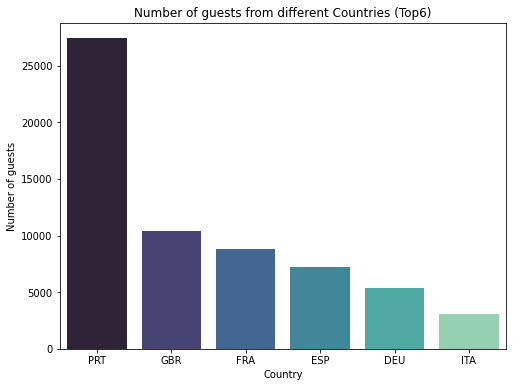

In [ ]:
#plot top 10 countries where most number of guests are coming
plt.figure(figsize=(8,6))
sns.barplot(x=hb['country'].value_counts().keys()[:6],y=hb['country'].value_counts()[:6],palette = 'mako')
plt.xlabel('Country')
plt.ylabel('Number of guests')
plt.title('Number of guests from different Countries (Top6)');

# **PORTUGAL(PRT) had the Most Number of Bookings with 48,590 Bookings, Out of which 30,960 are City hotel bookings and 17,630 are Resort hotel Bookings**